In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, confusion_matrix, log_loss, roc_auc_score, roc_curve
import seaborn as sn
import pandas as pd
from sklearn import preprocessing
from sklearn import utils
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_updated.csv')

In [3]:
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
0,15.31,670.0,36,4891.67,6000
1,19.72,670.0,36,3575.00,2000
2,14.27,665.0,36,4250.00,10625
3,21.67,670.0,60,14166.67,28000
4,21.98,665.0,36,6666.67,22000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
Interest.Rate     2497 non-null float64
FICO.Score        2499 non-null float64
Loan.Length       2500 non-null int64
Monthly.Income    2495 non-null float64
Loan.Amount       2500 non-null int64
dtypes: float64(3), int64(2)
memory usage: 97.7 KB


In [5]:
df.head()

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
0,15.31,670.0,36,4891.67,6000
1,19.72,670.0,36,3575.00,2000
2,14.27,665.0,36,4250.00,10625
3,21.67,670.0,60,14166.67,28000
4,21.98,665.0,36,6666.67,22000


In [6]:
#2327          20.49       660.0             NaN
#254           10.16       705.0             NaN
#513             NaN       690.0             NaN
#bankloan = bankloan.drop([2327, 254, 513])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
Interest.Rate     2497 non-null float64
FICO.Score        2499 non-null float64
Loan.Length       2500 non-null int64
Monthly.Income    2495 non-null float64
Loan.Amount       2500 non-null int64
dtypes: float64(3), int64(2)
memory usage: 97.7 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2497.0,13.067521,4.180074,5.42,10.16,13.11,15.8,24.89
FICO.Score,2499.0,705.870348,35.029051,640.00,680.00,700.00,725.0,830.00
Loan.Length,2500.0,41.260800,9.930893,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2495.0,5690.259599,3964.704795,588.50,3500.00,5000.00,6800.0,102750.00
Loan.Amount,2500.0,12406.500000,7801.544872,1000.00,6000.00,10000.00,17000.0,35000.00


In [8]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Interest.Rate     3
FICO.Score        1
Monthly.Income    5
dtype: int64

In [9]:
print(df[df.isnull().any(axis=1)][null_columns])

      Interest.Rate  FICO.Score  Monthly.Income
416             NaN       670.0         4500.00
420           20.49       660.0             NaN
967           10.16       705.0             NaN
1026            NaN       690.0             NaN
1035            NaN       690.0         3916.67
2100           6.62       775.0             NaN
2117           7.43       800.0             NaN
2125           6.62         NaN         5833.33


In [10]:
# Decided to remove the Monthly NaN records 5 records, 
#Interest.Rate and Fico.score nan values replaced with mean value
df = df.drop([420, 967, 1026, 2100, 2117])

In [11]:
print(df[df.isnull().any(axis=1)][null_columns])

      Interest.Rate  FICO.Score  Monthly.Income
416             NaN       670.0         4500.00
1035            NaN       690.0         3916.67
2125           6.62         NaN         5833.33


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2493.0,13.070558,4.176856,5.42,10.16,13.11,15.8,24.89
FICO.Score,2494.0,705.829992,34.972523,640.00,680.00,700.00,725.0,830.00
Loan.Length,2495.0,41.271343,9.938046,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2495.0,5690.259599,3964.704795,588.50,3500.00,5000.00,6800.0,102750.00
Loan.Amount,2495.0,12413.897796,7805.847038,1000.00,6000.00,10000.00,17000.0,35000.00


In [13]:
df['Interest.Rate'] = df['Interest.Rate'].fillna(df['Interest.Rate'].mean())
df['FICO.Score'] = df['FICO.Score'].fillna(df['FICO.Score'].mean())

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Interest.Rate,2495.0,13.070558,4.175181,5.42,10.16,13.11,15.8,24.89
FICO.Score,2495.0,705.829992,34.965511,640.00,680.00,700.00,725.0,830.00
Loan.Length,2495.0,41.271343,9.938046,36.00,36.00,36.00,36.0,60.00
Monthly.Income,2495.0,5690.259599,3964.704795,588.50,3500.00,5000.00,6800.0,102750.00
Loan.Amount,2495.0,12413.897796,7805.847038,1000.00,6000.00,10000.00,17000.0,35000.00


In [15]:
df.loc[[416, 1035, 2125]]

,Interest.Rate,FICO.Score,Loan.Length,Monthly.Income,Loan.Amount
416,13.070558,670.000000,36,4500.00,4800
1035,13.070558,690.000000,36,3916.67,12500
2125,6.620000,705.829992,36,5833.33,5600


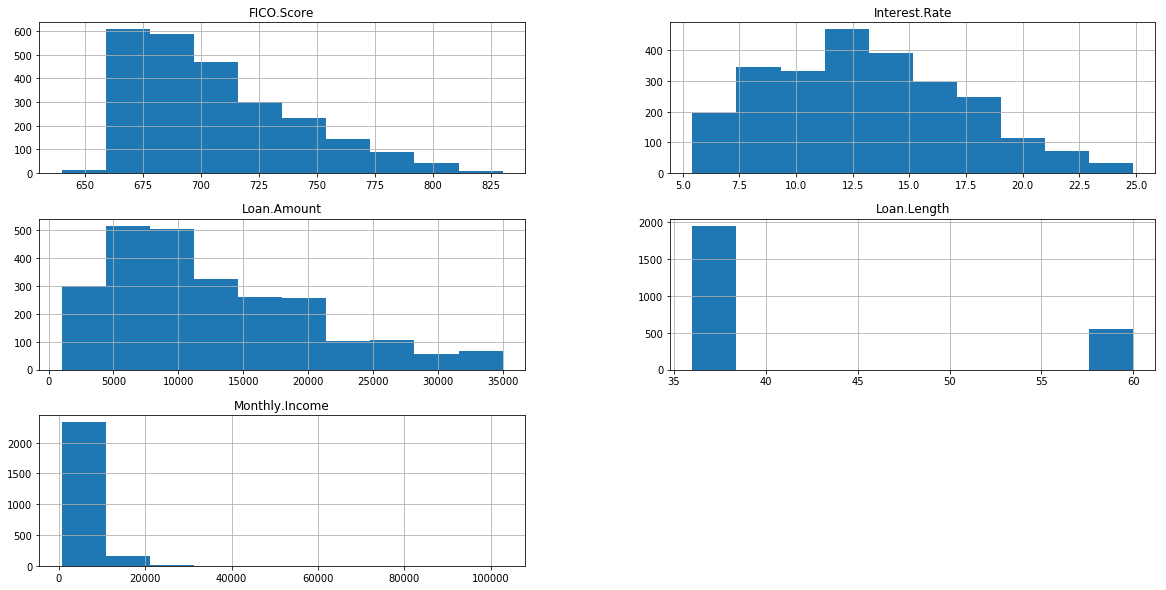

In [16]:
df.hist(figsize=(20,10));

In [17]:
df['9% or Lower'] = df['Interest.Rate'] <= 9
df['9% or Lower'] = df['9% or Lower'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 0 to 2499
Data columns (total 6 columns):
Interest.Rate     2495 non-null float64
FICO.Score        2495 non-null float64
Loan.Length       2495 non-null int64
Monthly.Income    2495 non-null float64
Loan.Amount       2495 non-null int64
9% or Lower       2495 non-null int32
dtypes: float64(3), int32(1), int64(2)
memory usage: 206.7 KB


In [18]:
y = df['9% or Lower'].values
X = df[['FICO.Score', 'Loan.Length', 'Monthly.Income', 'Loan.Amount']].values
X.shape, y.shape

((2495, 4), (2495,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [20]:
scalar = StandardScaler().fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [21]:
model = LogisticRegression(solver = 'lbfgs').fit(X_train, y_train)

In [22]:
params = {
          'penalty': ['l2'], 
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'fit_intercept': [True, False],
          'C': np.logspace(-3,3)
         }
gs = GridSearchCV(LogisticRegression(), param_grid=params, scoring='neg_log_loss', cv=10, n_jobs=5).fit(X_train, y_train)
gs

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=5,
       param_grid={'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'fit_intercept': [True, False], 'C': array([1.00000e-03, 1.32571e-03, 1.75751e-03, 2.32995e-03, 3.08884e-03,
       4.09492e-03, 5.42868e-03, 7.19686e-03, 9.54095e-03, 1.26486e-02,
       1.67683e-02, 2.2230... 1.84207e+02, 2.44205e+02,
       3.23746e+02, 4.29193e+02, 5.68987e+02, 7.54312e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

In [23]:
gs.best_estimator_

LogisticRegression(C=2.6826957952797246, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [24]:
gs.best_params_

{'C': 2.6826957952797246,
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [25]:
model = LogisticRegression(**gs.best_params_).fit(X_train, y_train)

In [26]:
y_hat = model.predict(X_test)
p_hat = model.predict_proba(X_test)[:,1]

In [27]:
log_loss(y_test, p_hat)

0.2190990377001329

In [28]:
baseline = 1 - (y_test.sum() / y_test.size)
accuracy = accuracy_score(y_test, y_hat)
baseline, accuracy

(0.787716955941255, 0.9038718291054739)

In [29]:
# TP / (TP + FP) # type 1 errors
precision_score(y_test, y_hat)

0.8270676691729323

In [30]:
# TP / (TP + FN) # type 2 errors --- focus on increasing this number
recall_score(y_test, y_hat)

0.6918238993710691

In [31]:
auc = roc_auc_score(y_test, p_hat)
auc

0.9566464129623707

In [32]:
fpr, tpr, thr = roc_curve(y_test, p_hat)
for th, fp, tp in zip(thr, fpr, tpr):
    print("{0:.2f} {1:.2f} {2:.2f}".format(th, fp, tp))

2.00 0.00 0.00
1.00 0.00 0.01
0.99 0.00 0.10
0.99 0.00 0.10
0.92 0.00 0.31
0.92 0.00 0.31
0.91 0.00 0.34
0.91 0.01 0.34
0.89 0.01 0.36
0.89 0.01 0.36
0.88 0.01 0.38
0.88 0.01 0.38
0.87 0.01 0.38
0.87 0.01 0.38
0.83 0.01 0.43
0.82 0.01 0.43
0.79 0.01 0.45
0.79 0.01 0.45
0.79 0.01 0.46
0.78 0.02 0.46
0.74 0.02 0.47
0.74 0.02 0.47
0.71 0.02 0.50
0.71 0.02 0.50
0.71 0.02 0.52
0.71 0.02 0.52
0.70 0.02 0.52
0.68 0.02 0.52
0.67 0.02 0.54
0.67 0.03 0.54
0.67 0.03 0.55
0.66 0.03 0.55
0.63 0.03 0.61
0.63 0.03 0.61
0.61 0.03 0.62
0.59 0.03 0.62
0.57 0.03 0.65
0.57 0.03 0.65
0.55 0.03 0.66
0.55 0.04 0.66
0.50 0.04 0.69
0.50 0.04 0.69
0.49 0.04 0.70
0.47 0.05 0.70
0.47 0.05 0.71
0.46 0.05 0.71
0.44 0.05 0.75
0.42 0.05 0.75
0.42 0.05 0.75
0.39 0.06 0.75
0.38 0.06 0.76
0.38 0.06 0.76
0.38 0.06 0.77
0.38 0.07 0.77
0.37 0.07 0.77
0.37 0.07 0.77
0.37 0.07 0.79
0.36 0.07 0.79
0.34 0.07 0.82
0.33 0.07 0.82
0.33 0.07 0.82
0.32 0.08 0.82
0.32 0.08 0.83
0.31 0.08 0.83
0.31 0.08 0.84
0.31 0.08 0.85
0.31 0.08 

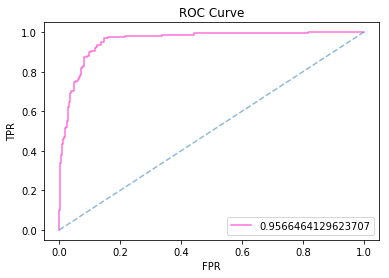

In [33]:
plt.plot(fpr, tpr, label=auc, color='#ff33cc', alpha=0.7)
plt.plot(np.linspace(0,1), np.linspace(0,1), linestyle='--', alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()